In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [100]:
%matplotlib inline

In [101]:
credit_card = pd.read_csv("default of credit card clients.csv")

In [102]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,6133,360000,1,2,1,57,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1,6134,240000,2,1,2,27,-2,-2,-2,-2,...,3958,12157,3874,9079,2804,3958,12157,3874,937,0
2,6135,280000,2,1,2,30,-1,-1,-1,-1,...,300,460,861,168,1206,300,460,861,7595,1
3,6136,150000,2,2,1,39,0,0,0,0,...,27587,25531,26586,5000,1650,2000,2000,3000,2000,0
4,6137,320000,1,2,2,30,0,0,0,0,...,26875,26318,25880,1353,1224,739,742,751,703,0


In [103]:
credit_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000,...,23868.000000,23868.000000,23868.000000,23868.000000,2.386800e+04,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000
mean,18066.500000,167929.599464,1.609310,1.861195,1.548349,35.499330,-0.021200,-0.129127,-0.166876,-0.214471,...,43872.648441,40518.479512,39060.879797,5666.057776,5.940190e+03,5419.750587,4868.263868,4768.850972,5217.486467,0.221217
std,6890.242449,129637.677095,0.487915,0.795068,0.520788,9.184927,1.123893,1.197825,1.190568,1.174924,...,64584.871181,60730.882380,59151.737178,16888.681026,2.174074e+04,17841.473229,15918.604817,15103.202593,17500.526070,0.415075
min,6133.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12099.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2441.750000,1873.250000,1332.000000,1000.000000,9.110000e+02,471.750000,300.000000,258.750000,169.750000,0.000000
50%,18066.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19321.000000,18286.500000,17281.500000,2100.000000,2.060000e+03,1943.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,24033.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55962.250000,50537.000000,49449.000000,5005.000000,5.000000e+03,4704.500000,4040.000000,4019.500000,4010.250000,0.000000
max,30000.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000,1.000000


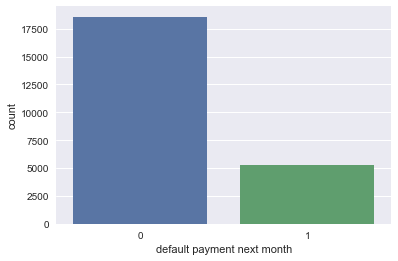

In [104]:
sns.countplot(credit_card['default payment next month'])

In [105]:
credit_card["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [106]:
def impute_marriage(cols):
    Marriage = cols[0]
    Age = cols[1]
    
    if (Marriage == 0):
        if(Age > 30):
            return 1
        else:
            return 2
        
    else: 
        return Marriage
            
        

        

In [107]:
credit_card['MARRIAGE'] = credit_card[['MARRIAGE','AGE']].apply(impute_marriage,axis=1)

In [108]:
credit_card["MARRIAGE"].unique()

array([1, 2, 3], dtype=int64)

In [109]:
credit_card["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

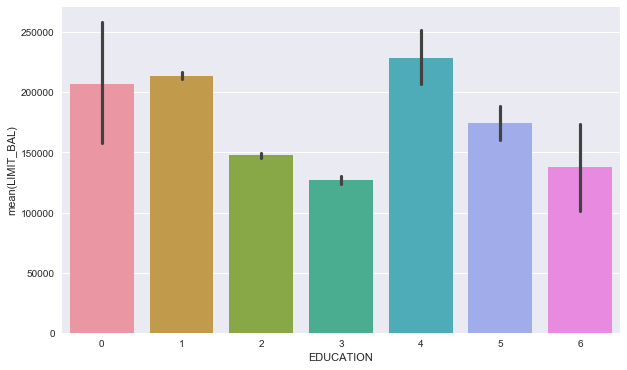

In [110]:
plt.figure(figsize=(10,6))
sns.barplot("EDUCATION","LIMIT_BAL",data=credit_card)

In [111]:
credit_card.EDUCATION.replace([0,5,6],[1,2,3],axis=1,inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:3675: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [112]:
credit_card["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [113]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,6133,360000,1,2,1,57,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1,6134,240000,2,1,2,27,-2,-2,-2,-2,...,3958,12157,3874,9079,2804,3958,12157,3874,937,0
2,6135,280000,2,1,2,30,-1,-1,-1,-1,...,300,460,861,168,1206,300,460,861,7595,1
3,6136,150000,2,2,1,39,0,0,0,0,...,27587,25531,26586,5000,1650,2000,2000,3000,2000,0
4,6137,320000,1,2,2,30,0,0,0,0,...,26875,26318,25880,1353,1224,739,742,751,703,0


In [114]:
credit_card["SEX"].unique()

array([1, 2], dtype=int64)

In [115]:
credit_card["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [116]:
credit_card["MARRIAGE"].unique()

array([1, 2, 3], dtype=int64)

In [117]:
credit_card.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [118]:
X =credit_card.drop(["ID","default payment next month"],axis=1)

In [119]:
y = credit_card['default payment next month']

In [120]:
from sklearn.preprocessing import StandardScaler


In [121]:
stand_X = StandardScaler().fit_transform(X)

In [122]:
X = stand_X

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [125]:
from sklearn.linear_model import LogisticRegression

In [156]:
lm = LogisticRegression(C=1)

In [157]:
lm.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
predict = lm.predict(X_test)

In [159]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.83      0.97      0.89      5615
          1       0.72      0.26      0.39      1546

avg / total       0.80      0.82      0.78      7161



In [150]:
fpr , tpr, threshold = roc_curve(y_test,predict)

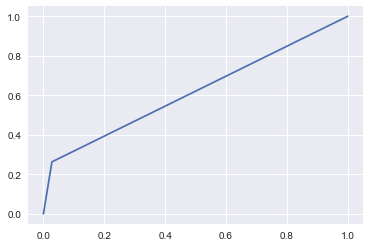

In [152]:
Logroc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr)

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [190]:
GBM = GradientBoostingClassifier(learning_rate=.05,n_estimators=100,min_samples_leaf=6,max_features=.3)
GBM.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=6,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [191]:
GBM_predict = GBM.predict(X_test)

In [192]:
print(confusion_matrix(y_test,GBM_predict))

[[5367  248]
 [ 980  566]]


In [193]:
print(classification_report(y_test,GBM_predict))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90      5615
          1       0.70      0.37      0.48      1546

avg / total       0.81      0.83      0.81      7161



In [198]:
fpr , tpr, _  = roc_curve(y_test,GBM_predict)

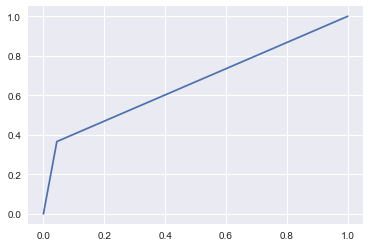

In [205]:
plt.plot(fpr,tpr)

In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
DTC = DecisionTreeClassifier()

In [133]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [134]:
DT_predict = DTC.predict(X_test)

In [135]:
print(classification_report(y_test,DT_predict))

             precision    recall  f1-score   support

          0       0.83      0.81      0.82      5615
          1       0.38      0.41      0.40      1546

avg / total       0.74      0.73      0.73      7161



In [146]:
from sklearn.metrics import roc_curve,auc

In [147]:
fpr , tpr ,threshold = roc_curve(y_test,DT_predict)

In [148]:
DTroc_auc = auc(fpr,tpr)

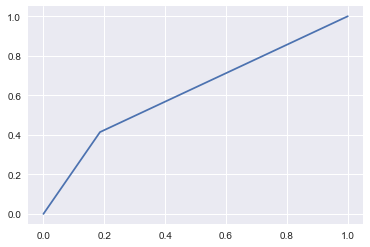

In [149]:
plt.plot(fpr,tpr)